<a href="https://colab.research.google.com/github/IKAR42/SberDS_Study/blob/main/HW_%22NLP2_homework_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NLP2_2 https://www.hackerrank.com/challenges/detect-the-domain-name/problem?isFullScreen=true

In [ ]:
import re
txt='\n'.join([input() for k in range(int(input()))])
print(*sorted(set(re.findall(r'https?://(?:ww(?:w|2)\.)?([\w\.\-]*\.[a-zA-Z]+)',txt))),sep=';')

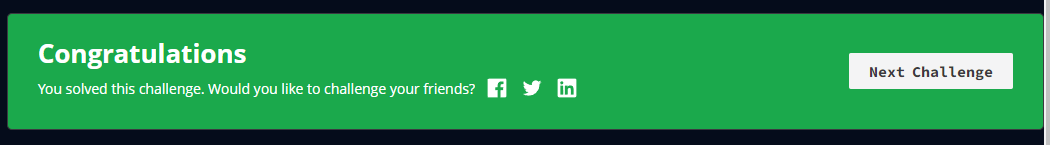

NLP2_3 (дз1): Реализовать stemming, lemmatization & BoW на следующем датасете: https://cloud.mail.ru/public/Z4L3/vB8GcgTtK (Russian Toxic-abuse comments)

In [4]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
df_1 = pd.read_csv('drive/My Drive/labeled.csv')

In [38]:
df_1.head(5)

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0


In [39]:
df_1['lower_comment'] = df_1['comment'].str.lower()

In [40]:
df_1

,comment,toxic,lower_comment
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0,"верблюдов-то за что? дебилы, бл...\n"
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0,"хохлы, это отдушина затюканого россиянина, мол..."
2,Собаке - собачья смерть\n,1.0,собаке - собачья смерть\n
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0,"страницу обнови, дебил. это тоже не оскорблени..."
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0,"тебя не убедил 6-страничный пдф в том, что скр..."
...,...,...,...
14407,Вонючий совковый скот прибежал и ноет. А вот и...,1.0,вонючий совковый скот прибежал и ноет. а вот и...
14408,А кого любить? Гоблина тупорылого что-ли? Или ...,1.0,а кого любить? гоблина тупорылого что-ли? или ...
14409,"Посмотрел Утомленных солнцем 2. И оказалось, ч...",0.0,"посмотрел утомленных солнцем 2. и оказалось, ч..."
14410,КРЫМОТРЕД НАРУШАЕТ ПРАВИЛА РАЗДЕЛА Т.К В НЕМ Н...,1.0,крымотред нарушает правила раздела т.к в нем н...


In [79]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 

In [87]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [82]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [70]:
df_1['lower_comment_4'] = df_1['lower_comment'].apply(word_tokenize)

In [76]:
df_1.head(5)

,comment,toxic,lower_comment,lower_comment_4
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0,"верблюдов-то за что? дебилы, бл...\n","[верблюдов-то, за, что, ?, дебилы, ,, бл, ...]"
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0,"хохлы, это отдушина затюканого россиянина, мол...","[хохлы, ,, это, отдушина, затюканого, россияни..."
2,Собаке - собачья смерть\n,1.0,собаке - собачья смерть\n,"[собаке, -, собачья, смерть]"
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0,"страницу обнови, дебил. это тоже не оскорблени...","[страницу, обнови, ,, дебил, ., это, тоже, не,..."
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0,"тебя не убедил 6-страничный пдф в том, что скр...","[тебя, не, убедил, 6-страничный, пдф, в, том, ..."


In [77]:
#Стемминг
df_1['stemmed'] = df_1['lower_comment_4'].apply(lambda x: [stemmer.stem(y) for y in x])

In [81]:
df_1.head(5)

,comment,toxic,lower_comment,lower_comment_4,stemmed
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0,"верблюдов-то за что? дебилы, бл...\n","[верблюдов-то, за, что, ?, дебилы, ,, бл, ...]","[верблюдов-т, за, что, ?, дебил, ,, бл, ...]"
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0,"хохлы, это отдушина затюканого россиянина, мол...","[хохлы, ,, это, отдушина, затюканого, россияни...","[хохл, ,, эт, отдушин, затюкан, россиянин, ,, ..."
2,Собаке - собачья смерть\n,1.0,собаке - собачья смерть\n,"[собаке, -, собачья, смерть]","[собак, -, собач, смерт]"
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0,"страницу обнови, дебил. это тоже не оскорблени...","[страницу, обнови, ,, дебил, ., это, тоже, не,...","[страниц, обнов, ,, деб, ., эт, тож, не, оскор..."
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0,"тебя не убедил 6-страничный пдф в том, что скр...","[тебя, не, убедил, 6-страничный, пдф, в, том, ...","[теб, не, убед, 6-страничн, пдф, в, том, ,, чт..."


In [88]:
# Лемматизация
df_1['lemmatize'] = df_1['lower_comment_4'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

In [92]:
df_1.head(5)

,comment,toxic,lower_comment,lower_comment_4,stemmed,lemmatize
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0,"верблюдов-то за что? дебилы, бл...\n","[верблюдов-то, за, что, ?, дебилы, ,, бл, ...]","[верблюдов-т, за, что, ?, дебил, ,, бл, ...]","[верблюдов-то, за, что, ?, дебилы, ,, бл, ...]"
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0,"хохлы, это отдушина затюканого россиянина, мол...","[хохлы, ,, это, отдушина, затюканого, россияни...","[хохл, ,, эт, отдушин, затюкан, россиянин, ,, ...","[хохлы, ,, это, отдушина, затюканого, россияни..."
2,Собаке - собачья смерть\n,1.0,собаке - собачья смерть\n,"[собаке, -, собачья, смерть]","[собак, -, собач, смерт]","[собаке, -, собачья, смерть]"
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0,"страницу обнови, дебил. это тоже не оскорблени...","[страницу, обнови, ,, дебил, ., это, тоже, не,...","[страниц, обнов, ,, деб, ., эт, тож, не, оскор...","[страницу, обнови, ,, дебил, ., это, тоже, не,..."
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0,"тебя не убедил 6-страничный пдф в том, что скр...","[тебя, не, убедил, 6-страничный, пдф, в, том, ...","[теб, не, убед, 6-страничн, пдф, в, том, ,, чт...","[тебя, не, убедил, 6-страничный, пдф, в, том, ..."


In [ ]:
# BoW
# В примере ниже взял конкретные 5 предложений, сделал из них мешок слов и пробежался с проверкой

In [105]:
def vectorize(tokens):
    ''' This function takes list of words in a sentence as input 
    and returns a vector of size of filtered_vocab.It puts 0 if the 
    word is not present in tokens and count of token if present.'''
    vector=[]
    for w in filtered_vocab:
        vector.append(tokens.count(w))
    return vector

def unique(sequence):
    '''This functions returns a list in which the order remains 
    same and no item repeats.Using the set() function does not 
    preserve the original ordering,so i didnt use that instead'''
    seen = set()
    return [x for x in sequence if not (x in seen or seen.add(x))]

#Стоп слова
stopwords=["хохлы","дебилы"]

#Спец символы
special_char=[",",":"," ",";",".","?"]

#Конкретные предложения для проверки с мешком 
string1="Верблюдов-то за что? дебилы, бл"
string2="Хохлы, это отдушина затюканого россиянина"
string3="Собаке - собачья смерть"
string4="Страницу обнови, дебил. это тоже не оскорблени"
string5="Тебя не убедил 6-страничный пдф в том"

#понижение всех слов в нижний регистр
string1=string1.lower()
string2=string2.lower()
string3=string3.lower()
string4=string4.lower()
string5=string5.lower()


#переводим в токены
tokens1=string1.split()
tokens2=string2.split()
tokens3=string3.split()
tokens4=string4.split()
tokens5=string5.split()

print(tokens1)
print(tokens2)
print(tokens3)
print(tokens4)
print(tokens5)

#создаем словарь (мешок)
vocab=unique(tokens1+tokens2+tokens3+tokens4+tokens5)
print(vocab)

#делаем фильтрацию
filtered_vocab=[]
for w in vocab: 
    if w not in stopwords and w not in special_char: 
        filtered_vocab.append(w)
print(filtered_vocab)

#convert sentences into vectords
vector1=vectorize(tokens1)
print(vector1)
vector2=vectorize(tokens2)
print(vector2)
vector3=vectorize(tokens3)
print(vector3)
vector4=vectorize(tokens4)
print(vector4)
vector5=vectorize(tokens5)
print(vector5)

['верблюдов-то', 'за', 'что?', 'дебилы,', 'бл']
['хохлы,', 'это', 'отдушина', 'затюканого', 'россиянина']
['собаке', '-', 'собачья', 'смерть']
['страницу', 'обнови,', 'дебил.', 'это', 'тоже', 'не', 'оскорблени']
['тебя', 'не', 'убедил', '6-страничный', 'пдф', 'в', 'том']
['верблюдов-то', 'за', 'что?', 'дебилы,', 'бл', 'хохлы,', 'это', 'отдушина', 'затюканого', 'россиянина', 'собаке', '-', 'собачья', 'смерть', 'страницу', 'обнови,', 'дебил.', 'тоже', 'не', 'оскорблени', 'тебя', 'убедил', '6-страничный', 'пдф', 'в', 'том']
['верблюдов-то', 'за', 'что?', 'дебилы,', 'бл', 'хохлы,', 'это', 'отдушина', 'затюканого', 'россиянина', 'собаке', '-', 'собачья', 'смерть', 'страницу', 'обнови,', 'дебил.', 'тоже', 'не', 'оскорблени', 'тебя', 'убедил', '6-страничный', 'пдф', 'в', 'том']
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [ ]:
#В примере ниже попытался поработать со всем датасетом, но почему то не отработал. Возможно памяти не хватает..

In [103]:
def vectorize(tokens):
    ''' This function takes list of words in a sentence as input 
    and returns a vector of size of filtered_vocab.It puts 0 if the 
    word is not present in tokens and count of token if present.'''
    vector=[]
    for w in filtered_vocab:
        vector.append(tokens.count(w))
    return vector

def unique(sequence):
    '''This functions returns a list in which the order remains 
    same and no item repeats.Using the set() function does not 
    preserve the original ordering,so i didnt use that instead'''
    seen = set()
    return [x for x in sequence if not (x in seen or seen.add(x))]

#create a list of stopwords.You can import stopwords from nltk too
stopwords=["хохлы","дебилы"]

#list of special characters.You can use regular expressions too
special_char=[",",":"," ",";",".","?"]

#create a vocabulary list
vocab= df_1['lower_comment_4'].tolist()
print(vocab)

#filter the vocabulary list
filtered_vocab=[]
for w in vocab: 
    if w not in stopwords and w not in special_char: 
        filtered_vocab.append(w)
print(filtered_vocab)

#convert sentences into vectords
vector1=vectorize(df_1['lower_comment_4'].iloc[585])
print(vector1)
vector2=vectorize(df_1['lower_comment_4'].iloc[1010])
print(vector2)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



NLP2_4 (дополнительно) Реализовать классификатор токсичных комментариев tfidf на базе датасета (если не успели на классном занятии)
https://www.kaggle.com/datasets/blackmoon/russian-language-toxic-comments  

Дубликат файла: https://cloud.mail.ru/public/Z4L3/vB8GcgTtK

